Дано: данные о популярности имен для новорожденных в директории /names.

In [24]:
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
DATA_PATH = 'names'

1) Построить график изменения количества имен Ruth и Robert с 1900 по 2000.

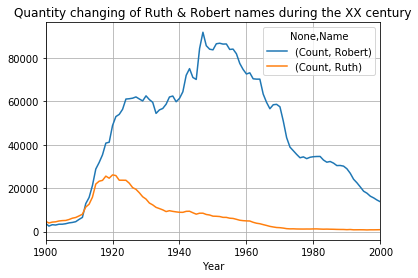

In [26]:
year_from = 1900
year_to = 2000
cols = ['Name','Gender','Count']

def names_dynamics_plot():
    names_by_year = {}

    for year in range(year_from, year_to + 1):
        names_by_year[year] = pd.read_csv('{}/yob{}.txt'.format(DATA_PATH, year), names=cols)
        names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
    
    name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
    plot = name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot(
        title="Quantity changing of Ruth & Robert names during the XX century", grid=True
        )
    
    return plot
    
names_dynamics_plot()

2) Построить гистограмму по количеству имен Ruth и Robert с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).

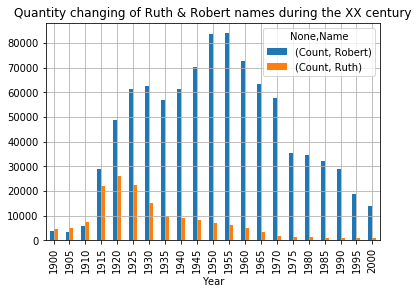

In [19]:
year_from = 1900
year_to = 2000
step = 5
cols = ['Name','Gender','Count']

def names_dynamics_plot_bar():
    names_by_year = {}

    for year in range(year_from, year_to + 1, step):
        names_by_year[year] = pd.read_csv('{}/yob{}.txt'.format(DATA_PATH, year), names=cols)
        names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
    
    name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
    name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot.bar(
        title="Quantity changing of Ruth & Robert names during the XX century", grid=True
        )
    
names_dynamics_plot_bar()

3) Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.

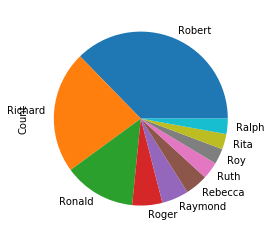

In [27]:
year = 1950
letter = 'R'
top = 10
cols = ['Name','Gender','Count']

def top_names_by_letter():
    all_names = pd.read_csv('{}/yob{}.txt'.format(DATA_PATH, year), names=cols)
    all_names_starts_by_letter = all_names[all_names['Name'].str.startswith(letter)]

    names_for_pie = all_names_starts_by_letter.groupby('Name').sum().sort_values(
        by='Count', ascending=False).head(top)
    plot_pie = names_for_pie.plot.pie(y='Count', legend=False)
    
    return plot_pie

top_names_by_letter()

4) Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

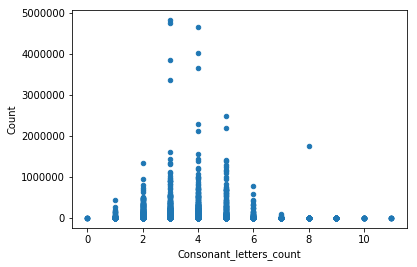

In [29]:
year_from = 1900
year_to = 2000
consonant_letters = r"[ B, C, D, F, G, H, J, K, L, M, N, P, Q, R, S, T, V, X, Z, W, Y]"
cols = ['Name','Gender','Count']

def consonant_letters_in_names_ratio():
    all_names = []

    for year in range(year_from, year_to + 1):
        names = pd.read_csv('{}/yob{}.txt'.format(DATA_PATH, year), names=cols)
        all_names.append(names)
        
    all_years_names = pd.concat(all_names)
    all_years_unique_names = all_years_names.groupby('Name', as_index=False).sum()
    all_years_unique_names['Consonant_letters_count'] = all_years_unique_names['Name'].str.count \
    (consonant_letters, flags=re.IGNORECASE)

    scatter_plot = all_years_unique_names.plot.scatter(x='Consonant_letters_count', y='Count')
    
    return scatter_plot

consonant_letters_in_names_ratio()